In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

In [2]:
%matplotlib inline

sns.set_theme(
  rc={"figure.figsize": (10,10)}
)

sns.set_theme(style='darkgrid')

In [3]:
print(None or True, None is None, sep='\n')

True
True


In [4]:
print(np.nan or True, np.nan == np.nan, np.nan is np.nan, np.nan/2, np.isnan(np.nan), sep='\n',)

nan
False
True
nan
True


In [5]:
test_missing_df = pd.DataFrame.from_dict(data=dict(x=[0,1,np.nan, np.nan, None], y=[0,1, pd.NA, np.nan, None]))

test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [6]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [7]:
test_missing_df['x'].isna()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [8]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [9]:
pd.Series([pd.to_datetime('2022-01-01'), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [10]:
pd.Series([-1]).isnull()

0    False
dtype: bool

In [11]:
import fs

/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/site-packages/fs/__init__.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/site-packages/fs/__init__.py:4: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('fs')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/site-packages/fs/opener/__init__.py:6: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('fs.opener')`.
Implementing implicit namespace packages (as specified in PEP 420) is pr

In [12]:
archivo = fs.open_fs('../data')

archivo.isdir('external')

True

In [13]:
pima_indians = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [14]:
!wget -O ../data/pima-indians-diabetes.csv {pima_indians} -q

/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=668) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [15]:
diabetes_df = pd.read_csv('../data/pima-indians-diabetes.csv')

In [16]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [17]:
datasets_dfs = {}

for dataset_name in datasets_names:
    print(f'{dataset_name}{extension}')
    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"../data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -O { dataset_output_file } { dataset_url } -q

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

oceanbuoys.rda


/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=668) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


pedestrian.rda


/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=668) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


riskfactors.rda


/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=668) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [18]:
locals().update(**datasets_dfs)

del datasets_dfs

In [19]:
oceanbuoys_df

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
0,1997.0,0.0,-110.0,27.590000,27.150000,79.599998,-6.4,5.4
1,1997.0,0.0,-110.0,27.549999,27.020000,75.800003,-5.3,5.3
2,1997.0,0.0,-110.0,27.570000,27.000000,76.500000,-5.1,4.5
3,1997.0,0.0,-110.0,27.620001,26.930000,76.199997,-4.9,2.5
4,1997.0,0.0,-110.0,27.650000,26.840000,76.400002,-3.5,4.1
...,...,...,...,...,...,...,...,...
731,1993.0,-2.0,-110.0,24.780001,24.620001,90.800003,-4.4,1.7
732,1993.0,-2.0,-110.0,24.879999,24.500000,91.099998,-3.0,0.2
733,1993.0,-2.0,-110.0,25.120001,24.889999,89.699997,-4.0,1.1
734,1993.0,-2.0,-110.0,25.160000,24.930000,89.500000,-4.3,2.5


In [20]:
pedestrian_df

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South)
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South)
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South)
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South)
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South)
...,...,...,...,...,...,...,...,...,...
37695,349,2016-12-31 19:00:00,2016,December,31,Saturday,19,23,Spencer St-Collins St (South)
37696,337,2016-12-31 20:00:00,2016,December,31,Saturday,20,23,Spencer St-Collins St (South)
37697,356,2016-12-31 21:00:00,2016,December,31,Saturday,21,23,Spencer St-Collins St (South)
37698,459,2016-12-31 22:00:00,2016,December,31,Saturday,22,23,Spencer St-Collins St (South)


In [21]:
riskfactors_df

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [22]:
df = pd.DataFrame.from_dict(
  data = {
  "a":list('asdasdasda'),
  "b":range(0,10)
  }
)

df.iloc[2:5,0] = None
df.iloc[6:7,1] = None

In [23]:
import sys 

sys.path.append('..')

from data.interim.utils.ext import MissingMethods

In [24]:
df = pd.DataFrame(df)

In [25]:
df.missing.number_complete()

16

In [26]:
%run MoreMissing.ipynb

In [27]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [28]:
riskfactors_df.shape

(245, 34)

In [29]:
riskfactors_df.missing.number_complete()

7144

In [30]:
riskfactors_df.missing.number_missing()

1186

In [31]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [32]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [33]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [34]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


In [36]:
riskfactors_df.missing.missing_variable_span(variable="weight_lbs",span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


In [37]:
riskfactors_df.missing.missing_variable_run(variable="weight_lbs")

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


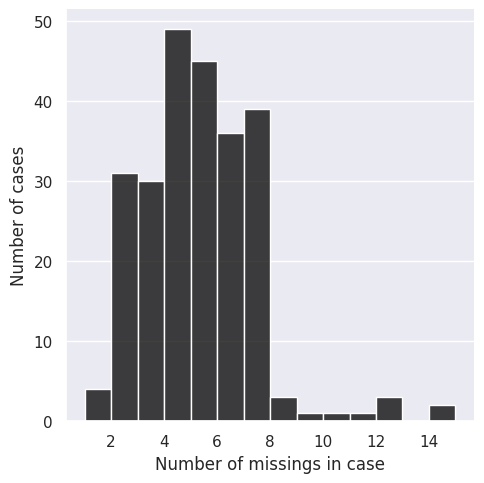

In [38]:
riskfactors_df.missing.missing_case_plot()

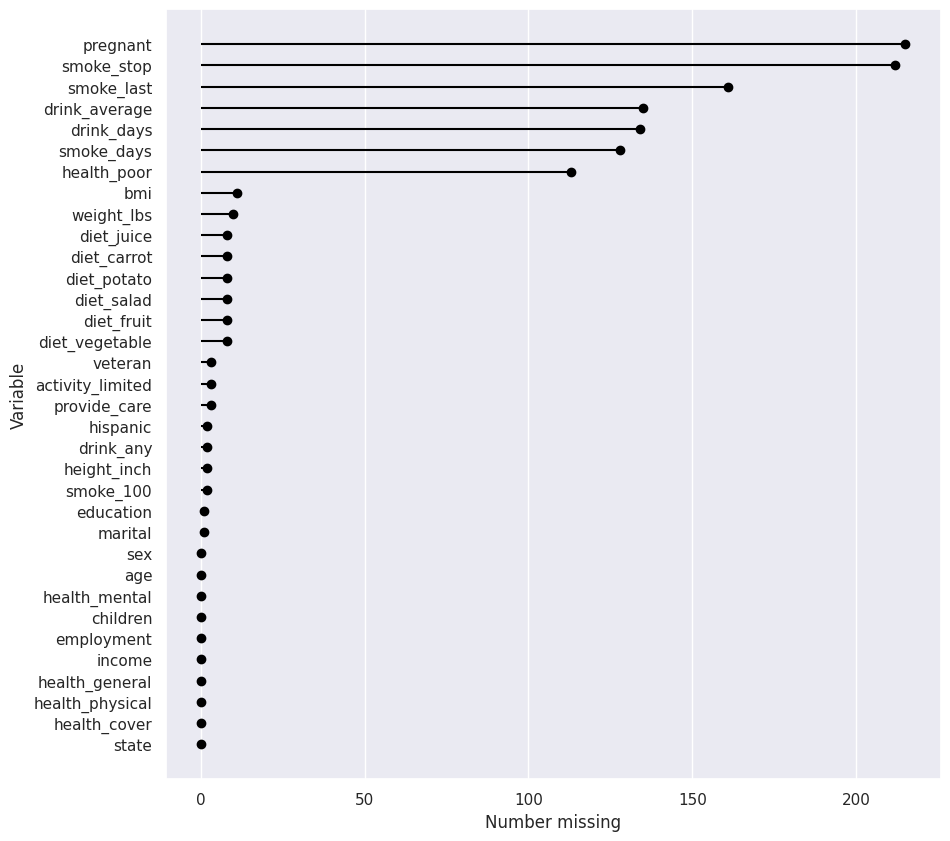

In [39]:
riskfactors_df.missing.missing_variable_plot()

<Axes: >

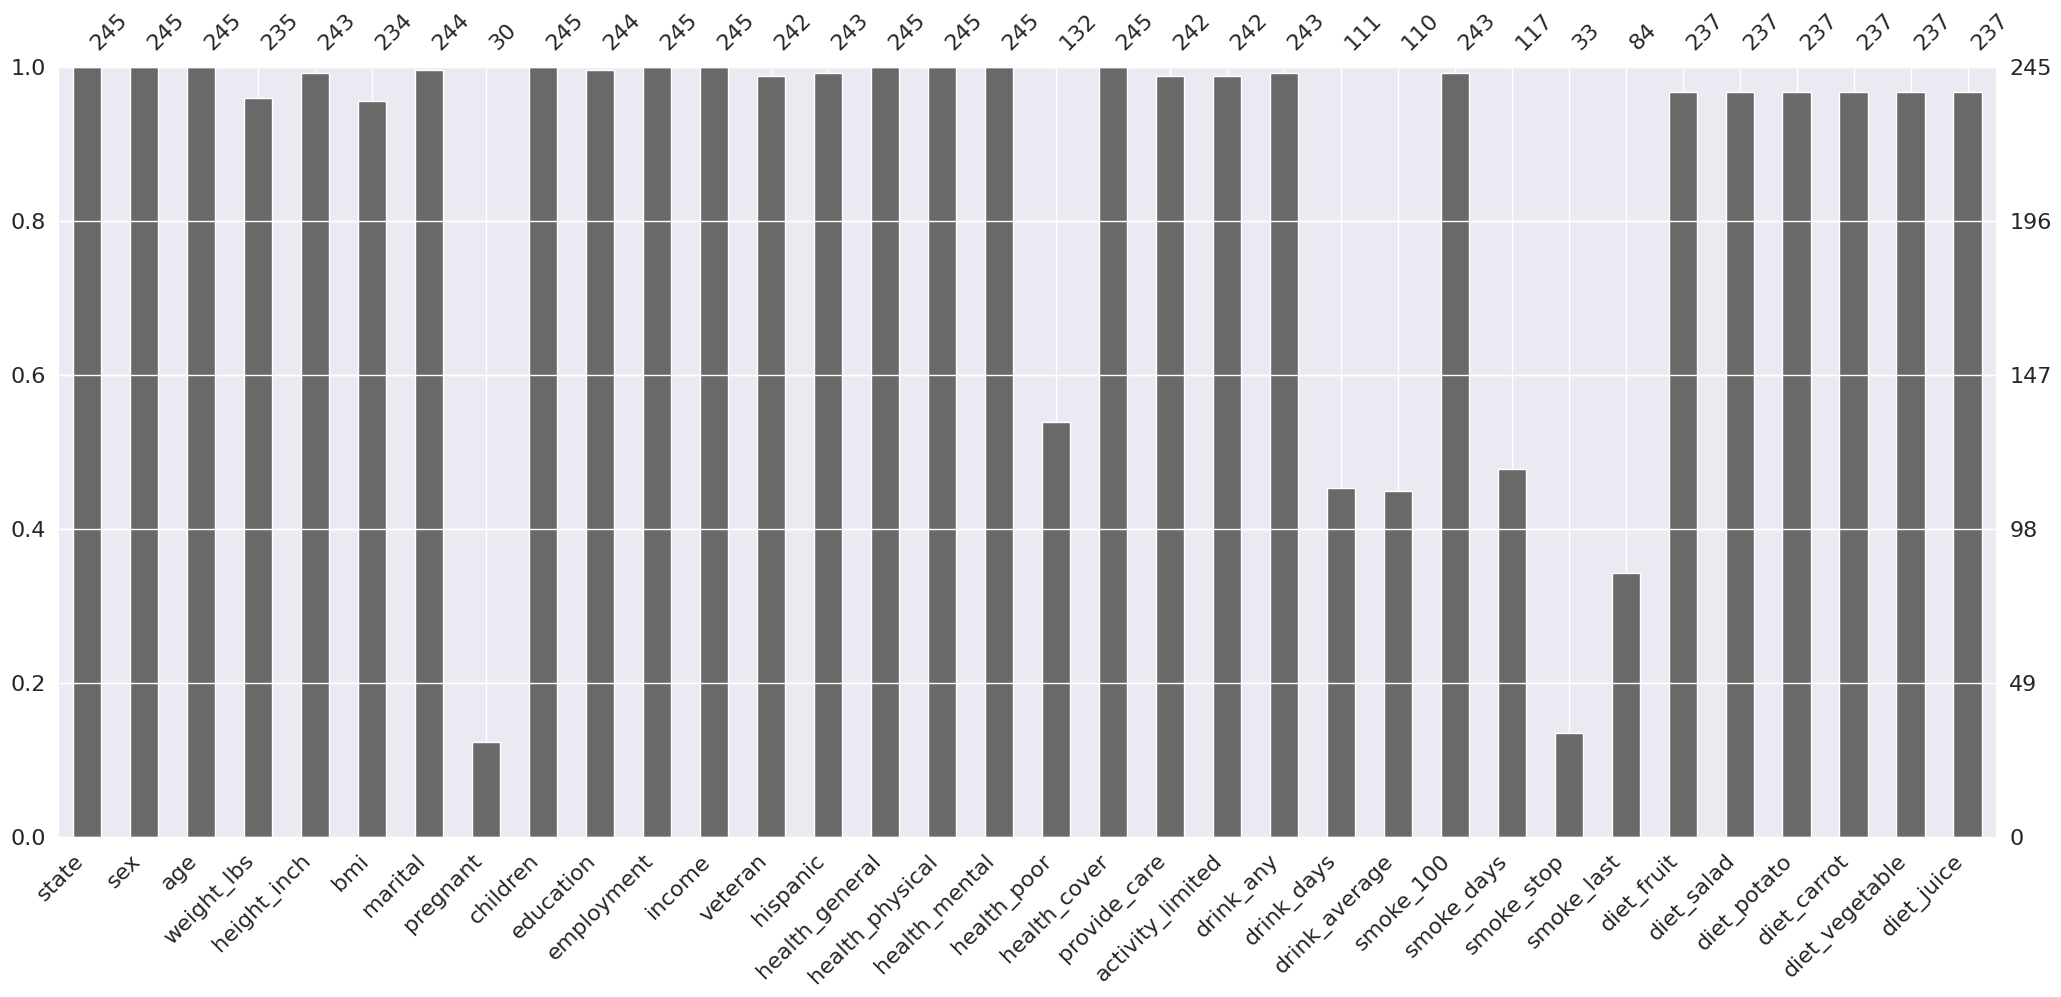

In [40]:
missingno.bar(df=riskfactors_df)

<Axes: >

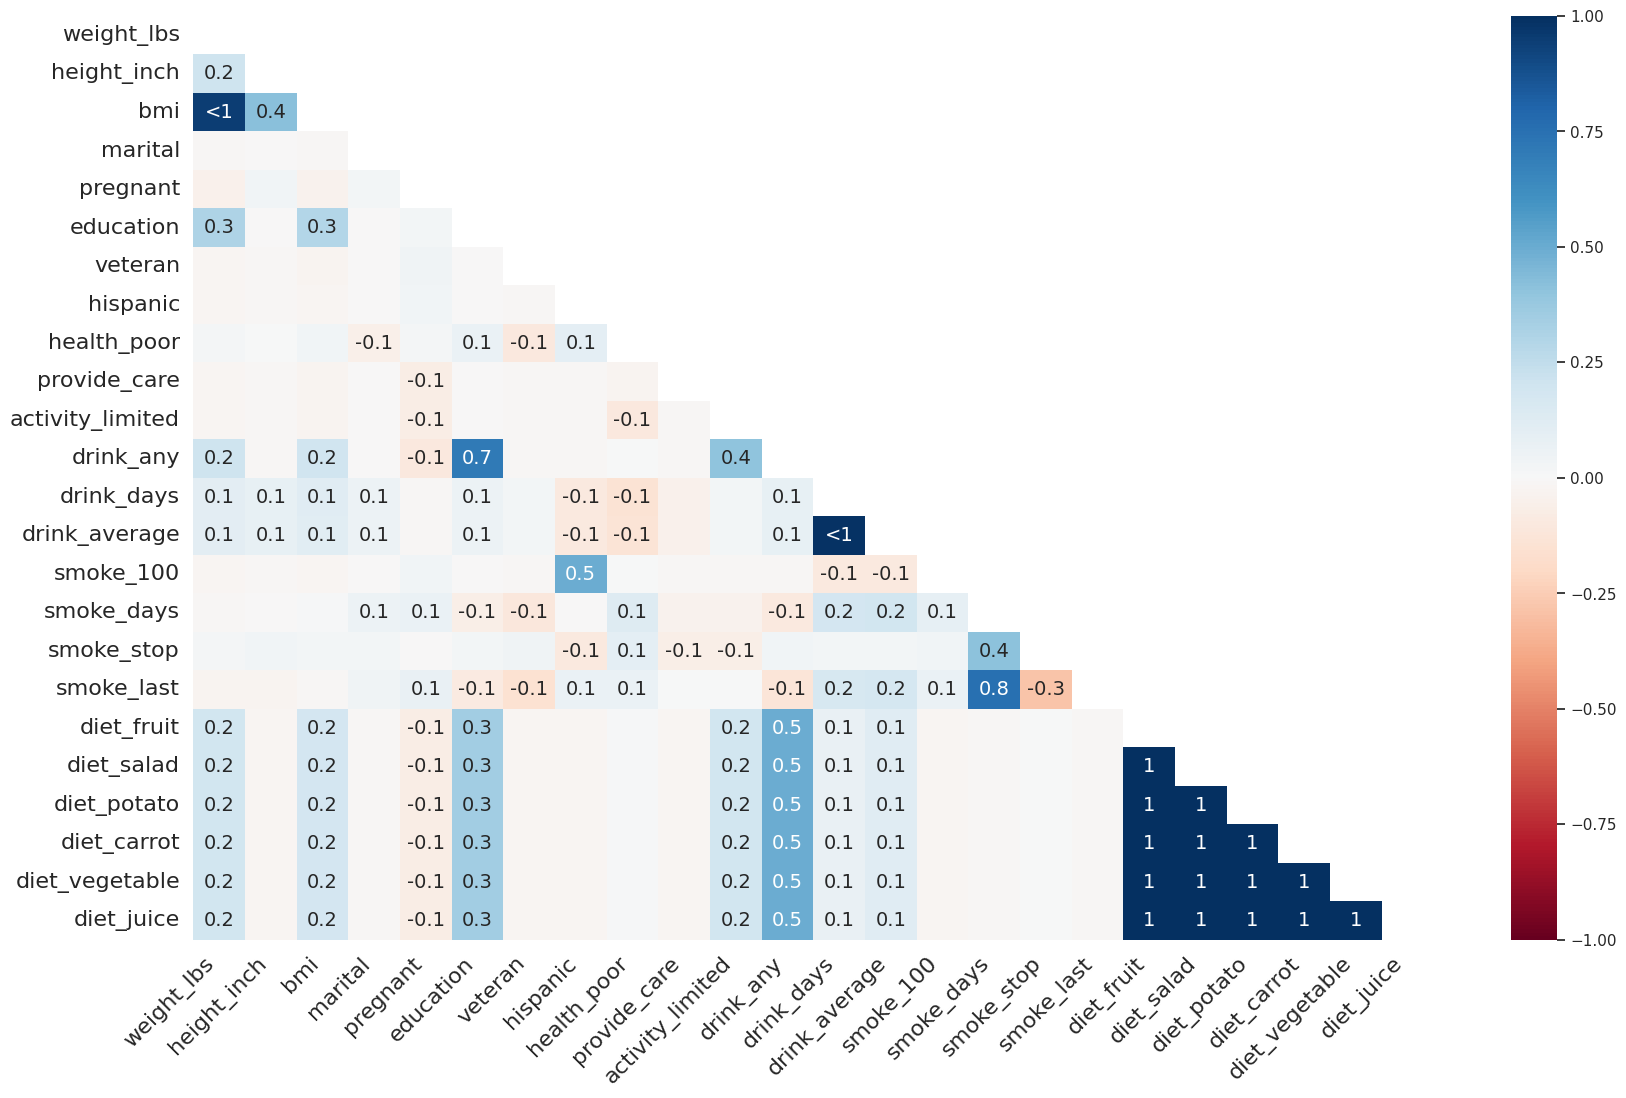

In [41]:
missingno.heatmap(df=riskfactors_df)

In [42]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [44]:
missing_data_example_df.replace(to_replace={'x':{-99: np.nan}, 'y':{'NA':np.nan, 'N/A':np.nan}})

,x,y,z
0,1,A,-100
1,3,NaN,-99
2,NA,NaN,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


In [46]:
missing_data_example_df.replace(to_replace=[-99, "NA", "N/A"], value=np.nan)

/tmp/ipykernel_668/1003095482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  missing_data_example_df.replace(to_replace=[-99, "NA", "N/A"], value=np.nan)


,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


In [48]:
implicit_to_explicit_df = pd.DataFrame.from_dict(data={
  "name":["lynn","lynn","lynn","zelda"],
  "time":["morning","afternoon","night","morning"],
  "value":[350,310, np.nan, 320]
})

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


In [50]:
implicit_to_explicit_df.pivot(index="name", columns="time", values="value")

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


In [56]:
implicit_to_explicit_df.value_counts(subset=['name']).reset_index(name='n').query('n<3')  

,name,n
1,zelda,1


In [59]:
implicit_to_explicit_df.complete(
  "name","time"
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


In [65]:
implicit_to_explicit_df.complete(
  {"name":["zelda","lynn"]},
  {"time":["afternoon","morning"]}, 
  sort=True
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0


In [68]:
implicit_to_explicit_df.complete(
  "name","time",
  fill_value=np.nan
)

/home/santix1233/anaconda3/envs/cookiecutter/lib/python3.12/site-packages/janitor/functions/complete.py:308: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  out = out.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


In [70]:
implicit_to_explicit_df.complete(
  "name","time",
  fill_value=0,
  explicit=False
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,0.0
4,zelda,morning,320.0
5,zelda,night,0.0


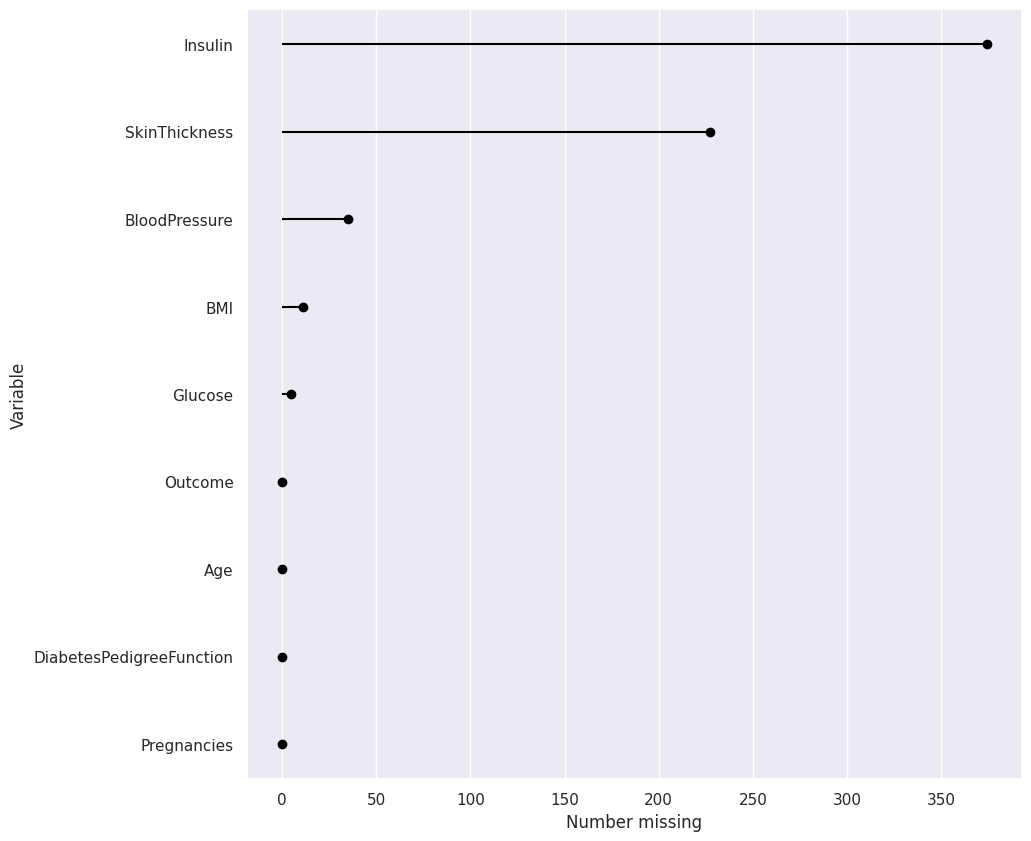

In [76]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)

diabetes_df.missing.missing_variable_plot()

In [83]:
diabetes_df.missing.sort_variables_by_missingness()

,Insulin,SkinThickness,BloodPressure,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


<Axes: >

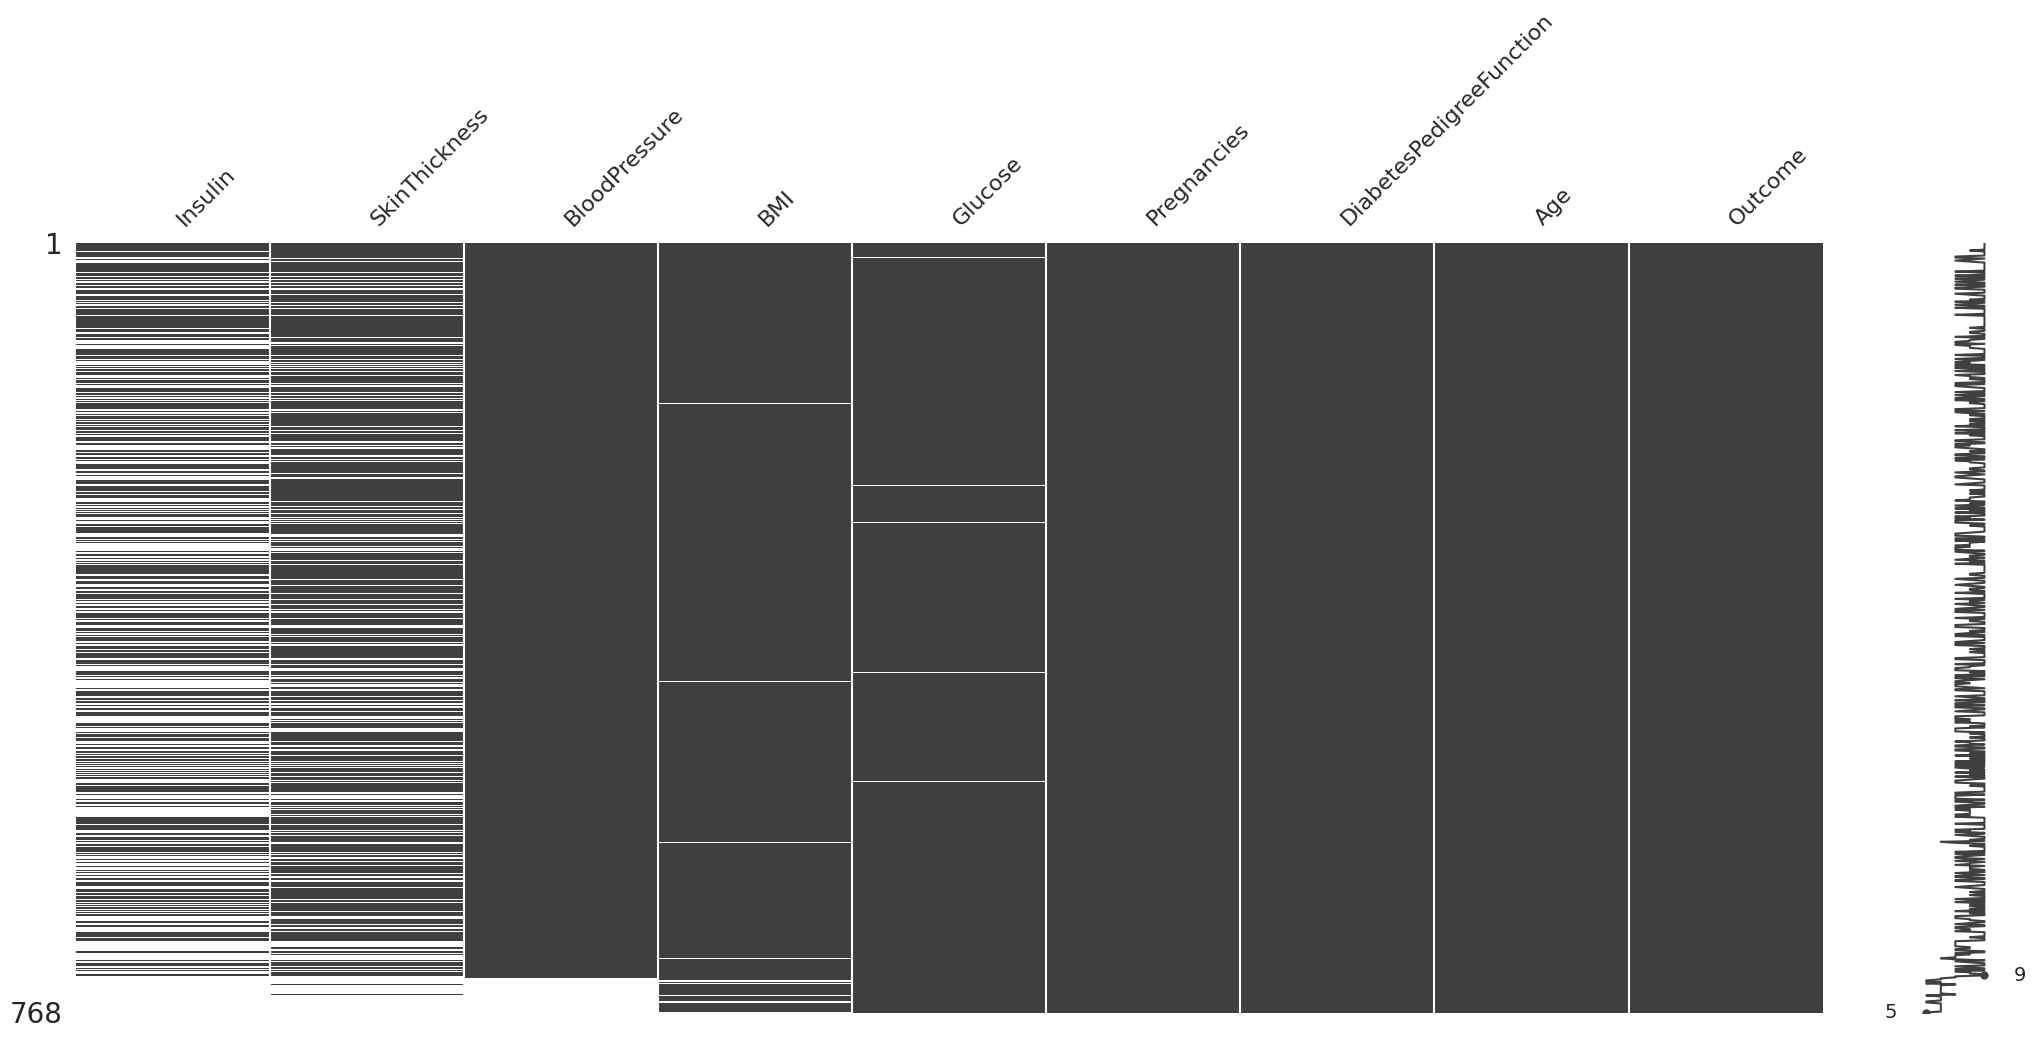

In [85]:
diabetes_df.missing.sort_variables_by_missingness().sort_values(by="BloodPressure").pipe(missingno.matrix)

<Axes: >

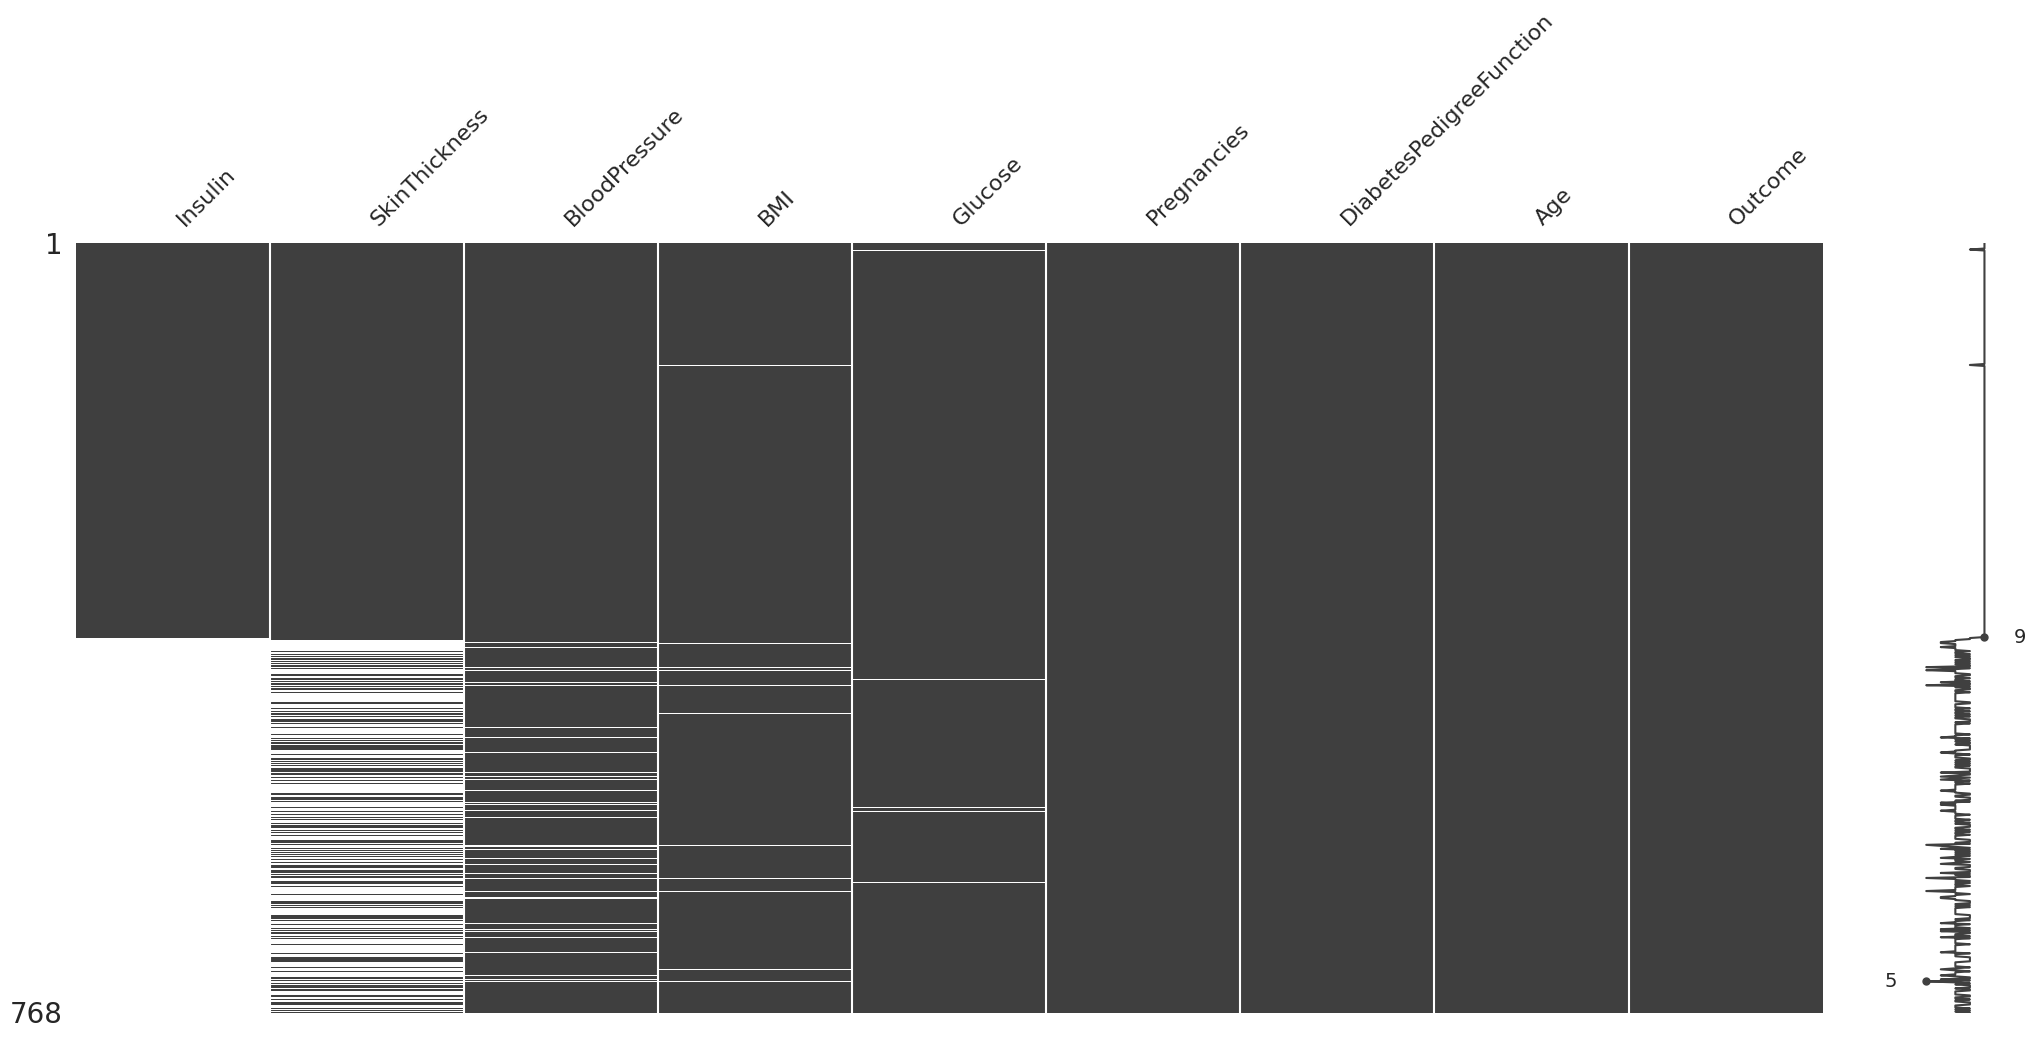

In [87]:
diabetes_df.missing.sort_variables_by_missingness().sort_values(by="Insulin").pipe(missingno.matrix)

In [94]:
datas = riskfactors_df.isna().replace({
  False: 'Not missing',
  True: 'Missing'
}).add_suffix('_NA').pipe(lambda shadow_matrix: pd.concat([riskfactors_df, shadow_matrix], axis='columns'))

datas

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


In [96]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [102]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).groupby(['weight_lbs_NA'])['age'].describe().reset_index()

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


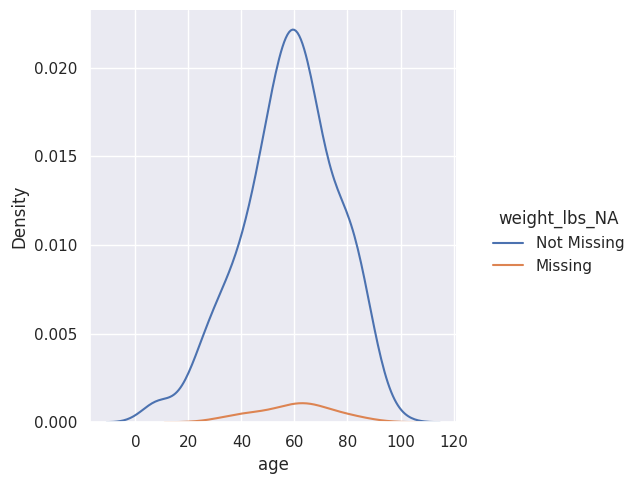

In [108]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: (sns.displot(data=df, x='age', hue='weight_lbs_NA', kind='kde')))

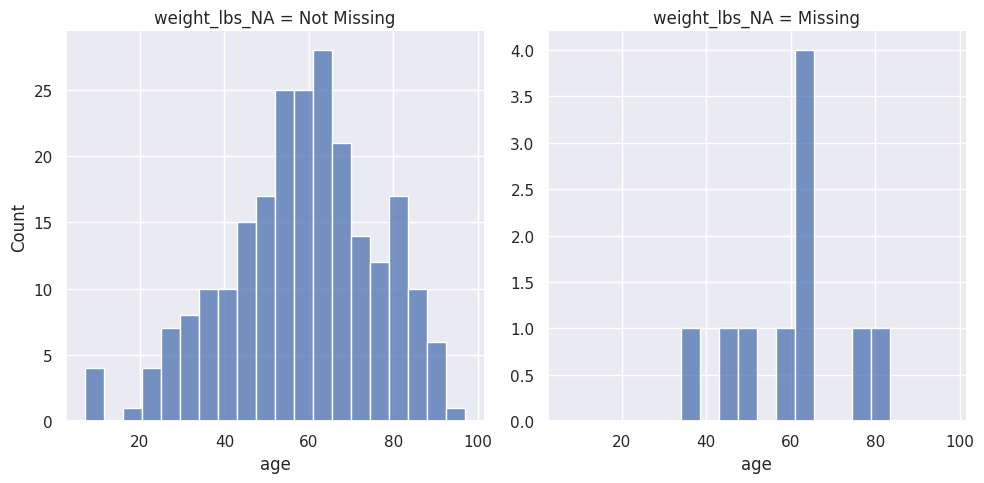

In [111]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: (sns.displot(data=df, x='age', col='weight_lbs_NA', facet_kws={"sharey":False}, bins=20)))

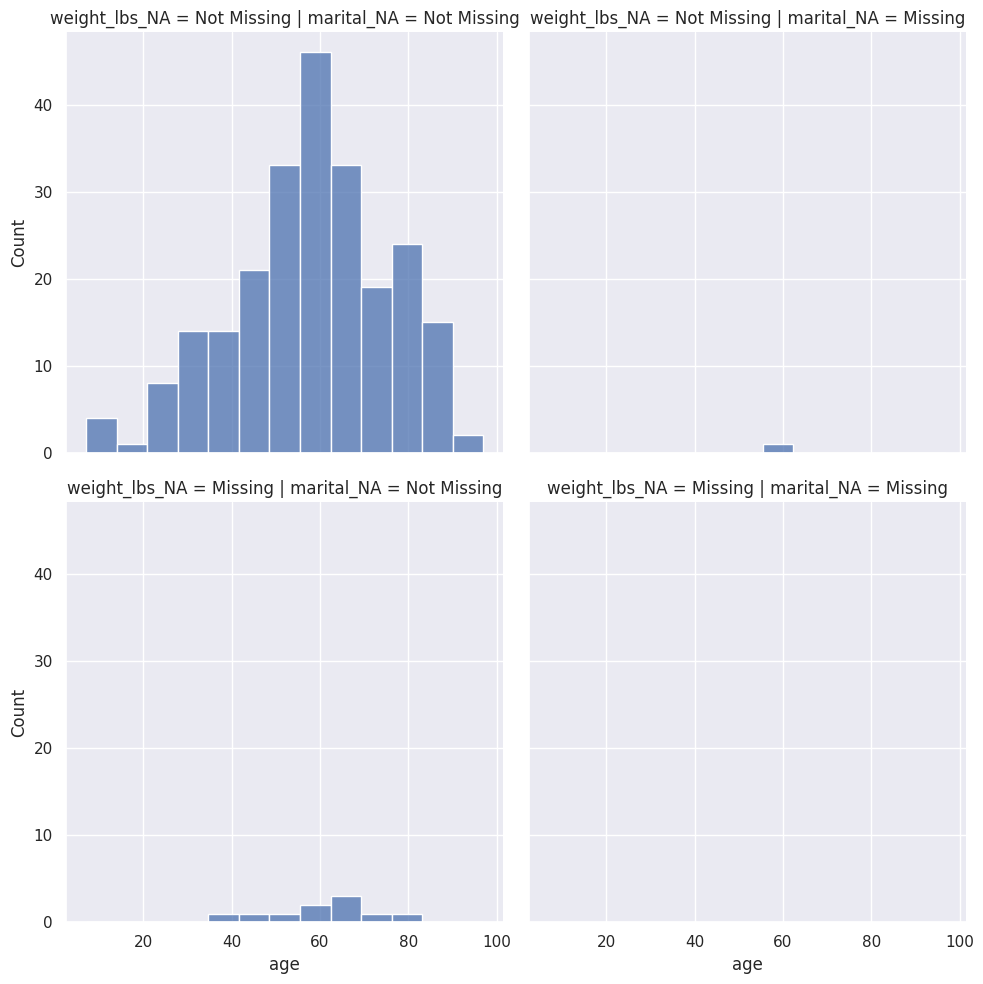

In [112]:
riskfactors_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: (sns.displot(data=df, x='age', col='marital_NA', row='weight_lbs_NA')))

In [114]:
def column_fill_with_dummies(column: pd.Series, proportion_below: float=0.1, jitter: float=0.075, seed: int=42) -> pd.Series:
  column = column.copy(deep=True)
  # Extract values metadata 

  missing_mask = column.isna()
  number_missing_values = missing_mask.sum()
  column_range = column.max() - column.min()

  # Shift data

  column_shift = column.min() - column.min() * proportion_below

  #Create noise "Jitter" to be added arount the points:

  np.random.seed(seed)
  column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

  # Save new dummy data.

  column[missing_mask] = column_shift + column_jitter

  return column


<Axes: xlabel='weight_lbs', ylabel='height_inch'>

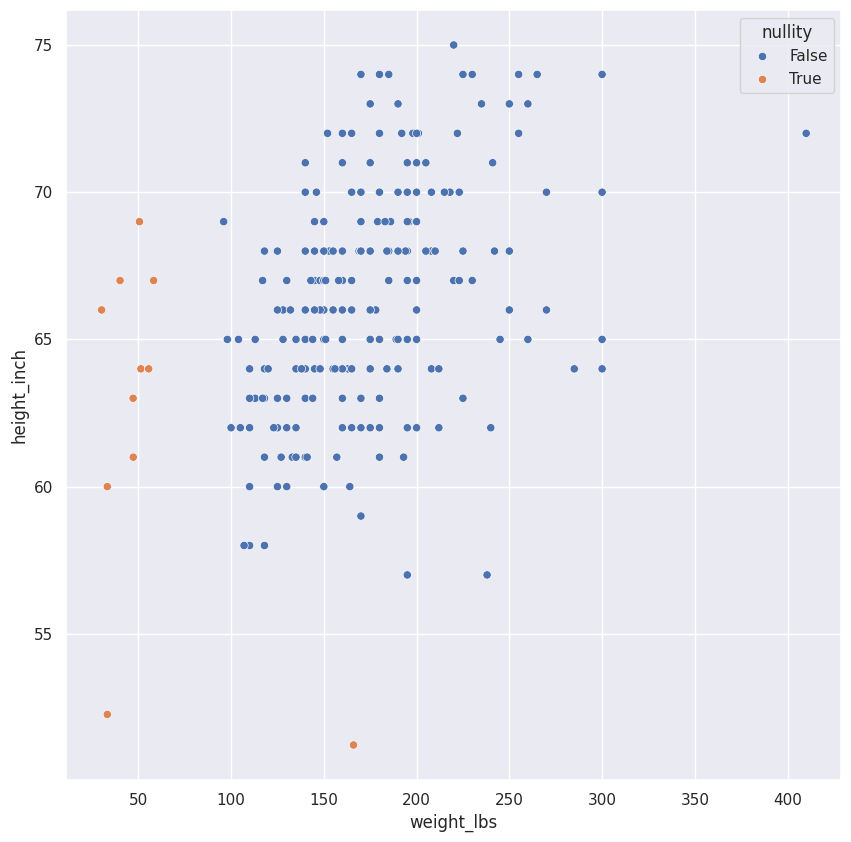

In [123]:
riskfactors_df.select_dtypes(exclude="category").pipe(
  lambda df: df[df.columns[df.isna().any()]]
).missing.bind_shadow_matrix(true_string = True, false_string = False).apply(lambda column: column if "_NA" in column.name else column_fill_with_dummies(column=column, proportion_below=0.05, jitter=0.1)).assign(nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA).pipe(lambda df: (sns.scatterplot(data = df, x="weight_lbs", y="height_inch", hue="nullity")))

<Axes: >

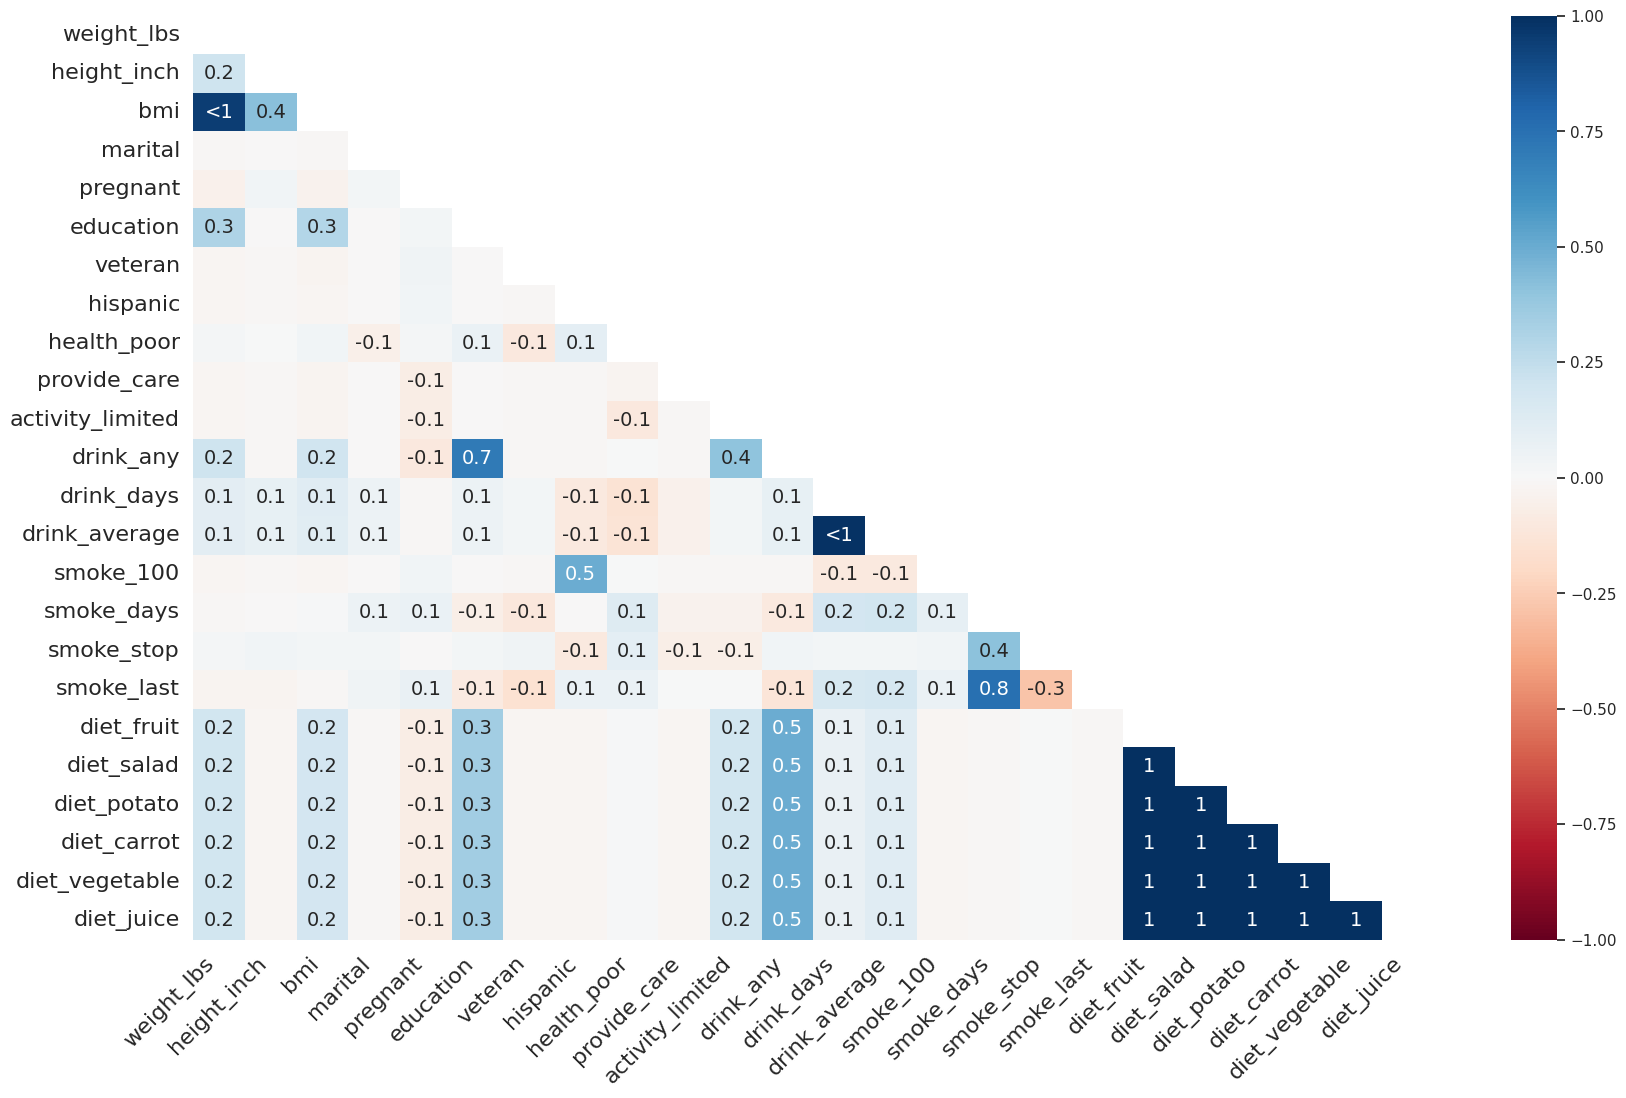

In [124]:
missingno.heatmap(df=riskfactors_df)

<Axes: >

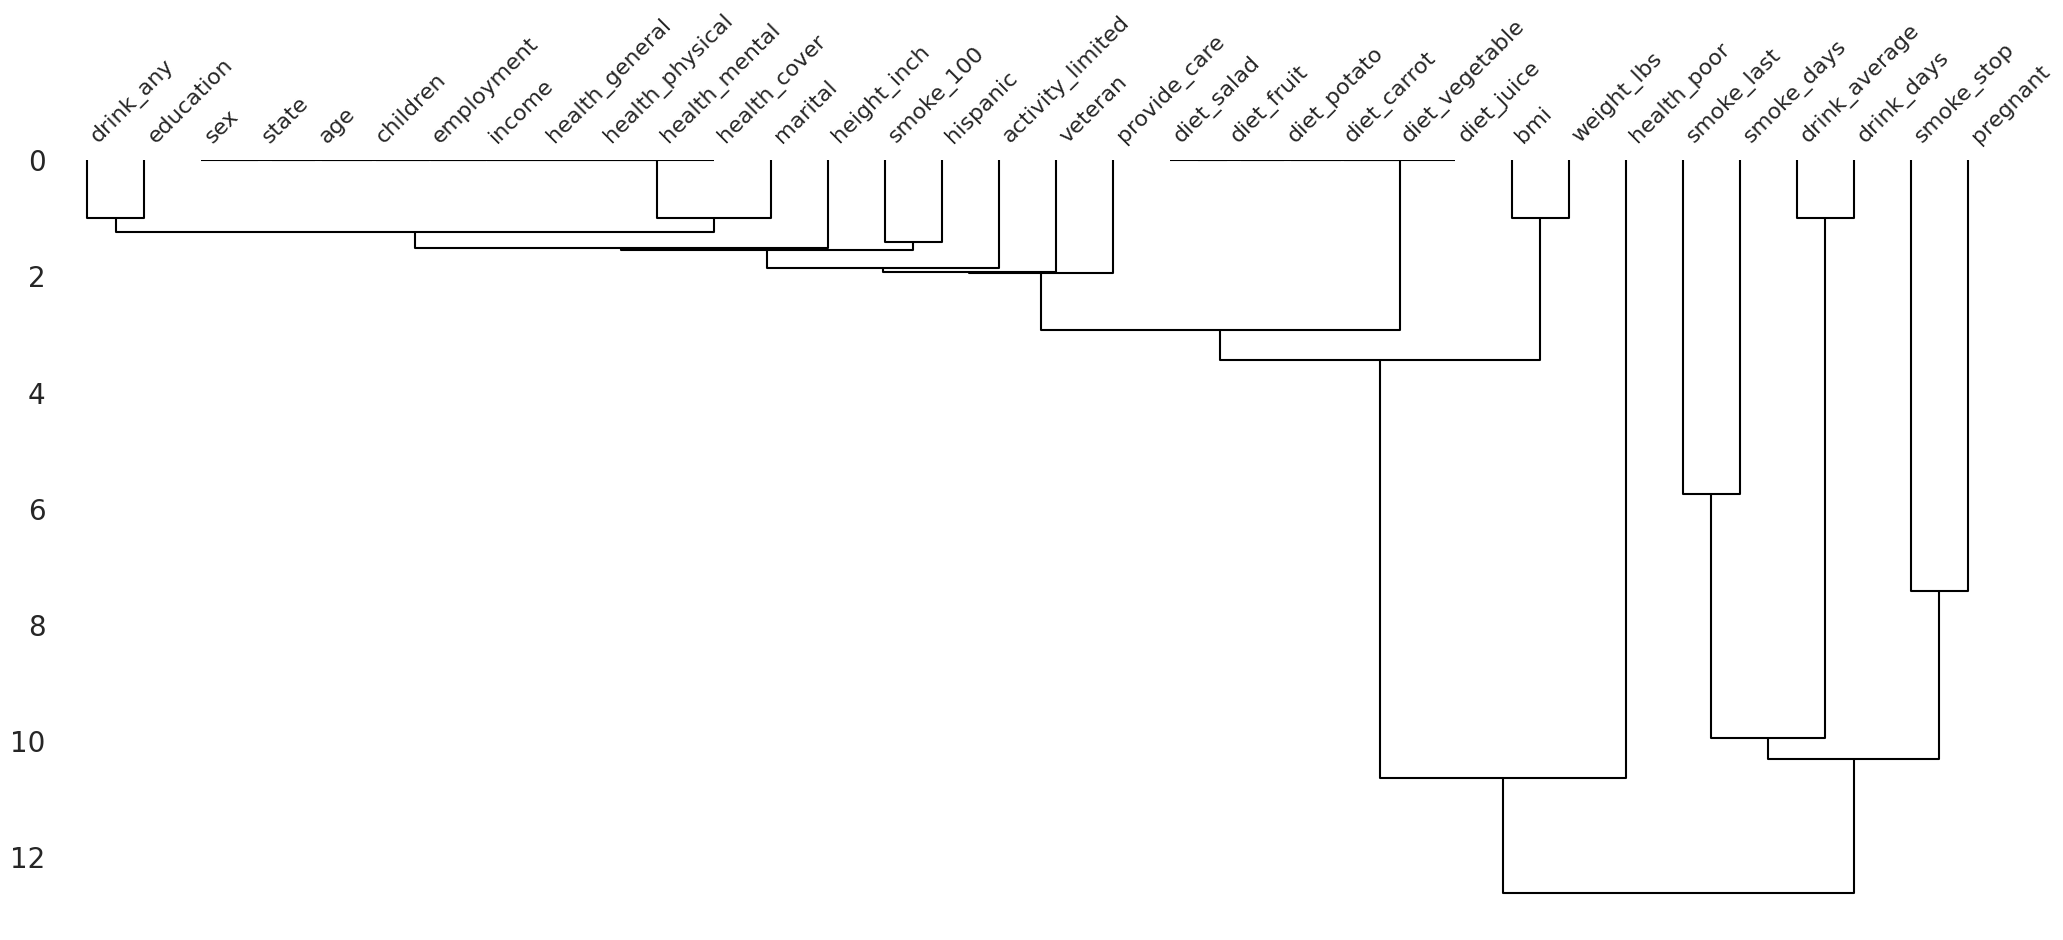

In [125]:
missingno.dendrogram(df=riskfactors_df)

In [126]:
riskfactors_df.weight_lbs.mean()

174.26808510638298

In [127]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [134]:
riskfactors_df.select_dtypes(exclude = "category").mean()



age                 58.106122
weight_lbs         174.268085
height_inch         66.345679
bmi                 27.784573
children              0.42449
health_physical      4.118367
health_mental        3.142857
health_poor          5.462121
drink_days           9.288288
drink_average        1.409091
diet_fruit         324.708861
diet_salad         175.481013
diet_potato        111.679325
diet_carrot         91.518987
diet_vegetable     407.147679
diet_juice         227.848101
dtype: object

In [138]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

In [139]:
riskfactors_df.dropna(subset=['weight_lbs'], how="any")

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [141]:
riskfactors_df.dropna(subset=['weight_lbs', 'height_inch'], how="any")

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


<Axes: >

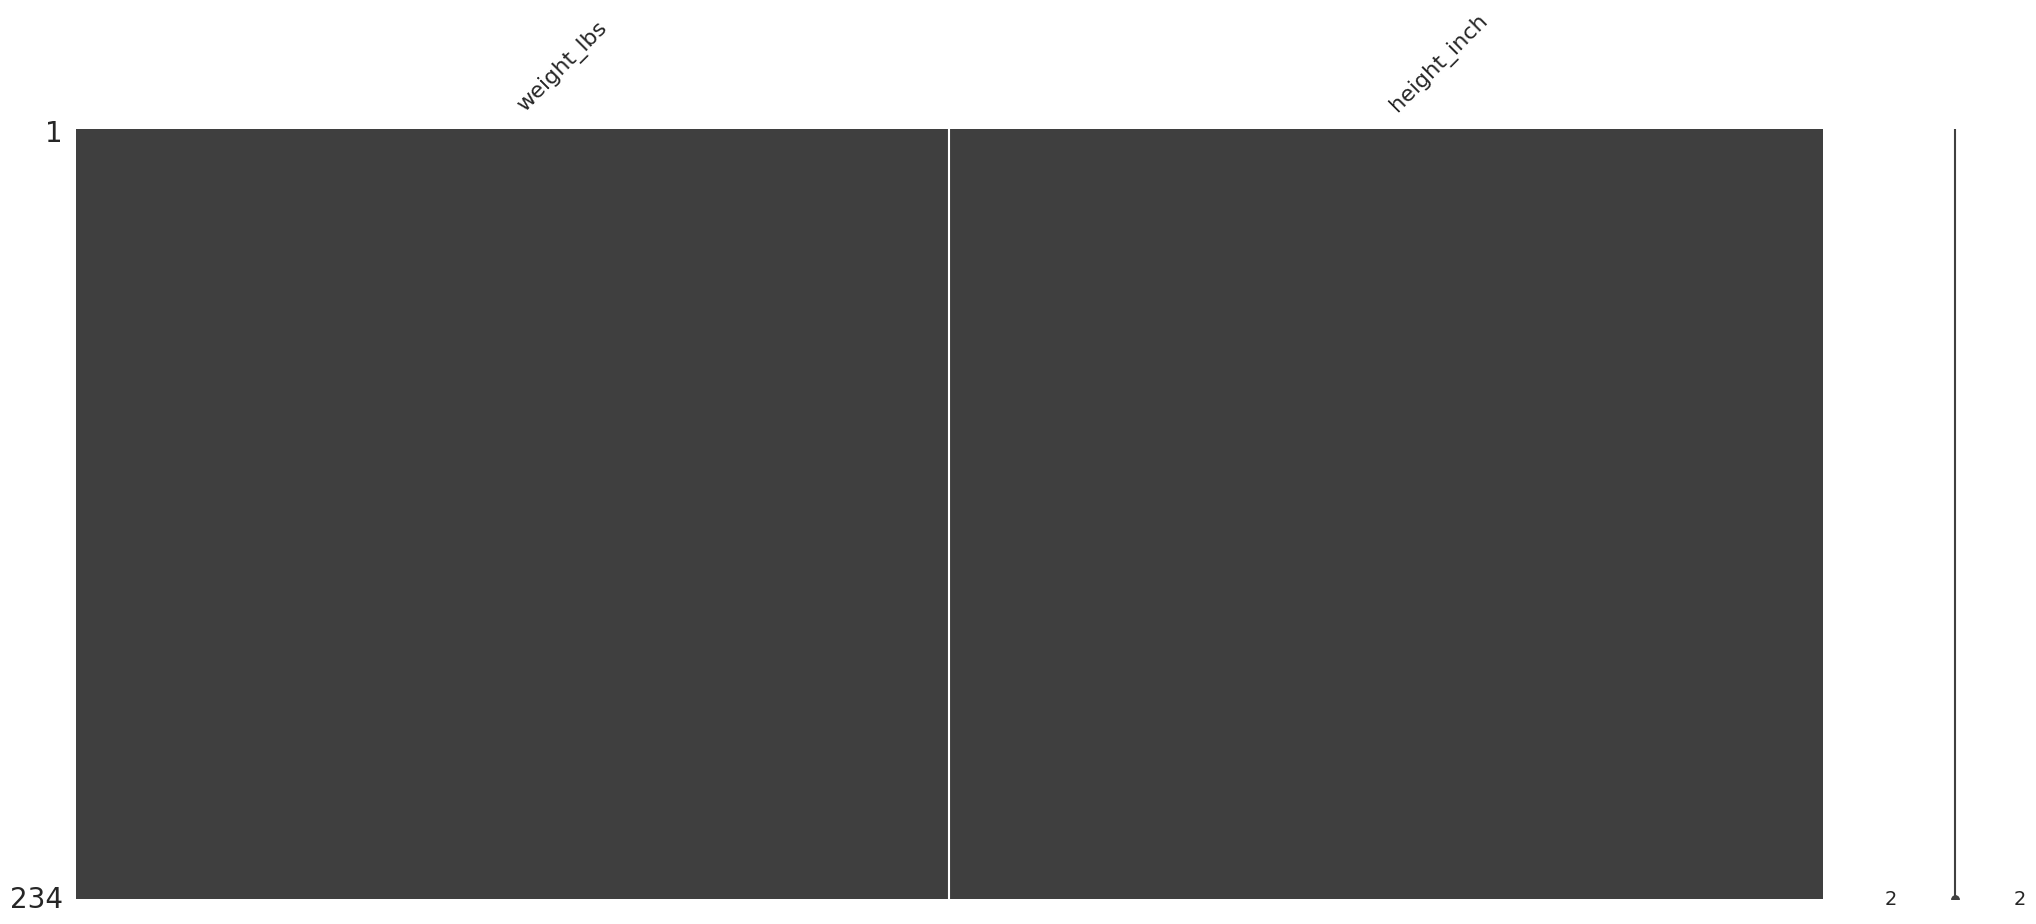

In [143]:
riskfactors_df.dropna(subset=['weight_lbs', 'height_inch'], how="any").select_columns(['weight_lbs','height_inch']).pipe(missingno.matrix)

In [144]:
# Crear un DataFrame de ejemplo con valores faltantes 
data = {'A': [1, 2, np.nan, 4, 5],'B': [1, np.nan, 3, np.nan, 5],'C': [1, 2, 3, 4, np.nan]}
data = pd.DataFrame(data)

data

,A,B,C
0,1.0,1.0,1.0
1,2.0,NaN,2.0
2,NaN,3.0,3.0
3,4.0,NaN,4.0
4,5.0,5.0,NaN


In [148]:
implicit_to_explicit_df = pd.DataFrame({'name':['lynn',np.nan, 'zelda', np.nan, 'shadowsong', np.nan], 'time':['morning','afternoon','morning','afternoon','morning','afternoon'], 'value':[350, 310, 320, 350, 310, 320]})

implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


In [150]:
riskfactors_df.select_columns('weight_lbs', 'height_inch', 'bmi').missing.bind_shadow_matrix(true_string = True, false_string = False)

,weight_lbs,height_inch,bmi
0,190,64,32.68
1,170,68,25.90
2,163,64,28.04
3,230,74,29.59
4,135,62,24.74
...,...,...,...
240,144,63,25.56
241,170,74,21.87
242,175,71,24.46
243,138,64,23.74
